In [11]:
import os, sys
my_path = '/content/notebooks'
os.symlink('/content/drive/MyDrive/Colab Notebooks/my_env', my_path)

sys.path.insert(0, my_path)

In [4]:
import numpy as np

stu1 = [100, 90, 30, 40]
stu2 = [90, 100, 20, 50]
stu3 = [50, 70, 100, 90]
stu4 = [40, 60, 90, 95]
stu5 = [60, 50, 60, 45]
X = np.array([stu1, stu2, stu3, stu4, stu5])

print(X)


[[100  90  30  40]
 [ 90 100  20  50]
 [ 50  70 100  90]
 [ 40  60  90  95]
 [ 60  50  60  45]]


In [8]:
import pandas as pd
stu_id = ['stu'+str(v+1) for v in range(5)]

pd.DataFrame(X, columns = ['kor','eng','math','sci'], index=stu_id)

,kor,eng,math,sci
stu1,100,90,30,40
stu2,90,100,20,50
stu3,50,70,100,90
stu4,40,60,90,95
stu5,60,50,60,45


In [10]:
from sklearn.decomposition import PCA
pca4= PCA(n_components = 4)
pc4 = pca4.fit_transform(X)
pc_id = ['PC'+str(v+1) for v in range(4)]
pd.DataFrame(pc4, columns = pc_id, index=stu_id)

,PC1,PC2,PC3,PC4
stu1,-51.817067,-1.485613,7.916656,2.472060
stu2,-52.143411,-13.206153,-7.682111,-1.909825
stu3,49.059551,-11.668766,8.304995,-2.006836
stu4,52.455462,-5.150836,-7.536688,2.468144
stu5,2.445464,31.511369,-1.002852,-1.023542


In [15]:
var_pc = np.var(pc4, axis=0)
pd.DataFrame(var_pc, index=pc_id, columns=['Varidance'])


,Varidance
PC1,2113.667806
PC2,266.453418
PC3,49.693721
PC4,4.185055


In [16]:
print("주성분 분석 결과, 총 분산의 합=", np.sum(var_pc))

주성분 분석 결과, 총 분산의 합= 2433.9999999999995


In [19]:
var_X = np.var(X, axis=0)
print("총 분산의합 = ", np.sum(var_X))

총 분산의합 =  2434.0


In [24]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(X)

var_scaled_X = np.var(scaled_X, axis=0)
print("표준화된 데이터 분산의 합 = ", np.sum(var_scaled_X))

표준화된 데이터 분산의 합 =  4.0


In [26]:
scaled_pc4 = pca4.fit_transform(scaled_X)
pd.DataFrame(scaled_pc4, columns=pc_id, index=stu_id)

,PC1,PC2,PC3,PC4
stu1,2.121492,0.024253,0.285185,0.108155
stu2,2.091616,-0.592956,-0.298529,-0.079486
stu3,-1.719470,-0.643293,0.303414,-0.093508
stu4,-2.121192,-0.305398,-0.247644,0.114272
stu5,-0.372446,1.517395,-0.042426,-0.049433


In [28]:
var_scaled_pc = np.var(scaled_pc4, axis=0)
print("표준화된 데이터에 대한 주성분 결과 분석, 총 분산의 합 =", np.sum(var_scaled_pc))

표준화된 데이터에 대한 주성분 결과 분석, 총 분산의 합 = 4.000000000000002


In [30]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(scaled_X)
pd.DataFrame(pc2, index=stu_id, columns=pc_id[:2])

,PC1,PC2
stu1,2.121492,0.024253
stu2,2.091616,-0.592956
stu3,-1.719470,-0.643293
stu4,-2.121192,-0.305398
stu5,-0.372446,1.517395


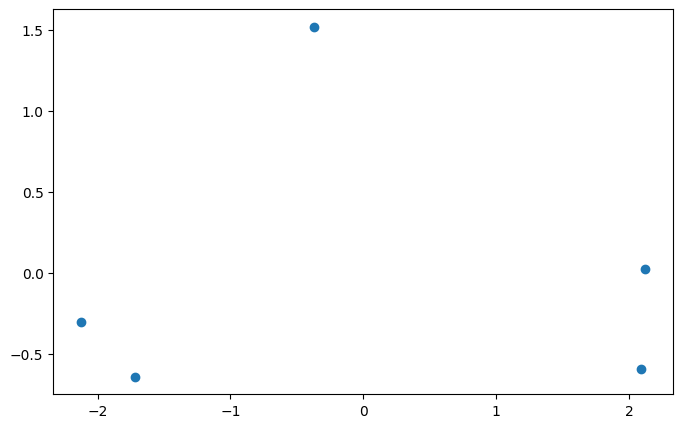

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))
plt.scatter(pc2[:,0], pc2[:,1])
plt.show()

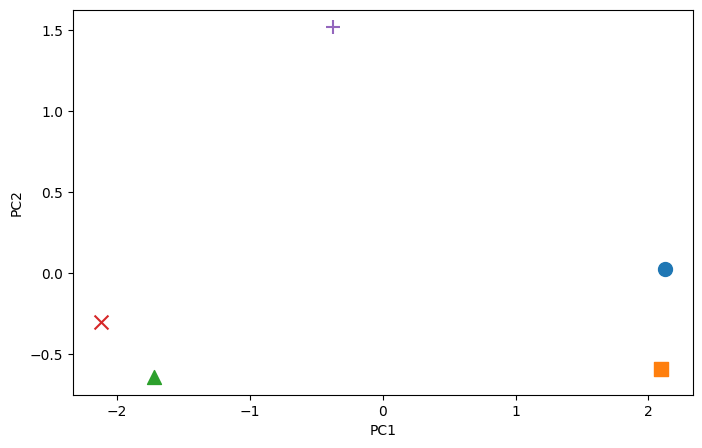

In [33]:
plt.figure(figsize=(8,5))
PC1 = pc2[:, 0]
PC2 = pc2[:, 1]
M = ['o','s','^','x','+']
for i in range(len(PC1)) :
  plt.scatter(PC1[i], PC2[i], marker=M[i], s=100)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [34]:
pd.DataFrame(pca2.components_, index=['PC1', 'PC2'], columns=['W_kor','W_eng','W_math','W_sci'])

,W_kor,W_eng,W_math,W_sci
PC1,0.543452,0.438129,-0.537065,-0.473566
PC2,-0.058438,-0.760505,-0.119050,-0.635645


In [35]:
pca= PCA(n_components=4)
pc4 = pca.fit_transform(scaled_X)
var_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(var_ratio) * 100
print(cum_var)

[ 82.35167974  98.16050693  99.78869427 100.        ]


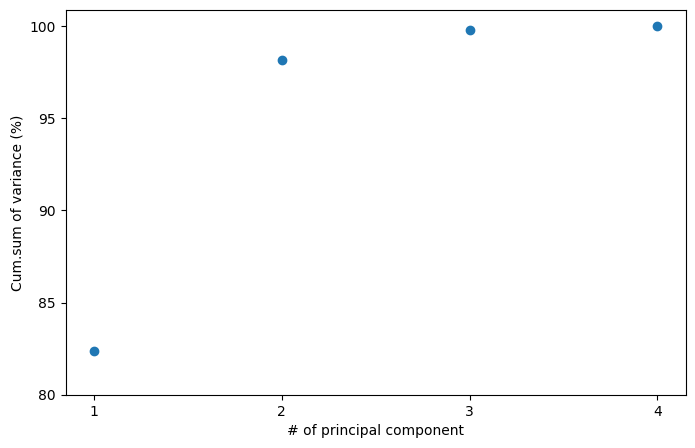

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(x=[1,2,3,4],
y=cum_var)
plt.xticks([1, 2, 3, 4])
plt.xlabel('# of principal component')
plt.yticks([80, 85, 90, 95, 100])
plt.ylabel('Cum.sum of variance (%)')
plt.show()

In [40]:
k=2
results = pc4[:,:k]
pd.DataFrame(results, index=stu_id, columns=pc_id[:k])

,PC1,PC2
stu1,2.121492,0.024253
stu2,2.091616,-0.592956
stu3,-1.719470,-0.643293
stu4,-2.121192,-0.305398
stu5,-0.372446,1.517395


In [41]:
from sklearn.datasets import load_digits
data, target = load_digits (return_X_y=True)
data.shape, target.shape

((1797, 64), (1797,))

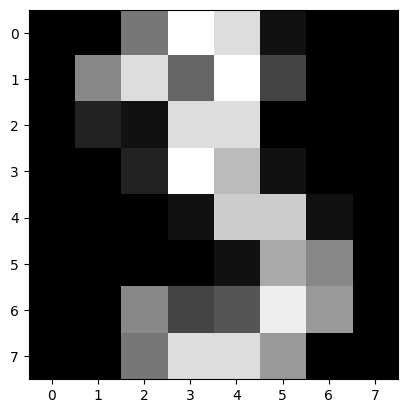

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
img = data[3].reshape(8, 8) 
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()


In [43]:
import numpy as np
import pandas as pd
digits, counts = np.unique(target, return_counts=True)
pd.DataFrame({'DIgits': digits, 'Frequency':counts})

,DIgits,Frequency
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


In [45]:
from sklearn.preprocessing import StandardScaler
scaled_X =StandardScaler().fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pc64 = pca.fit_transform(scaled_X)

var_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(var_ratio) * 100

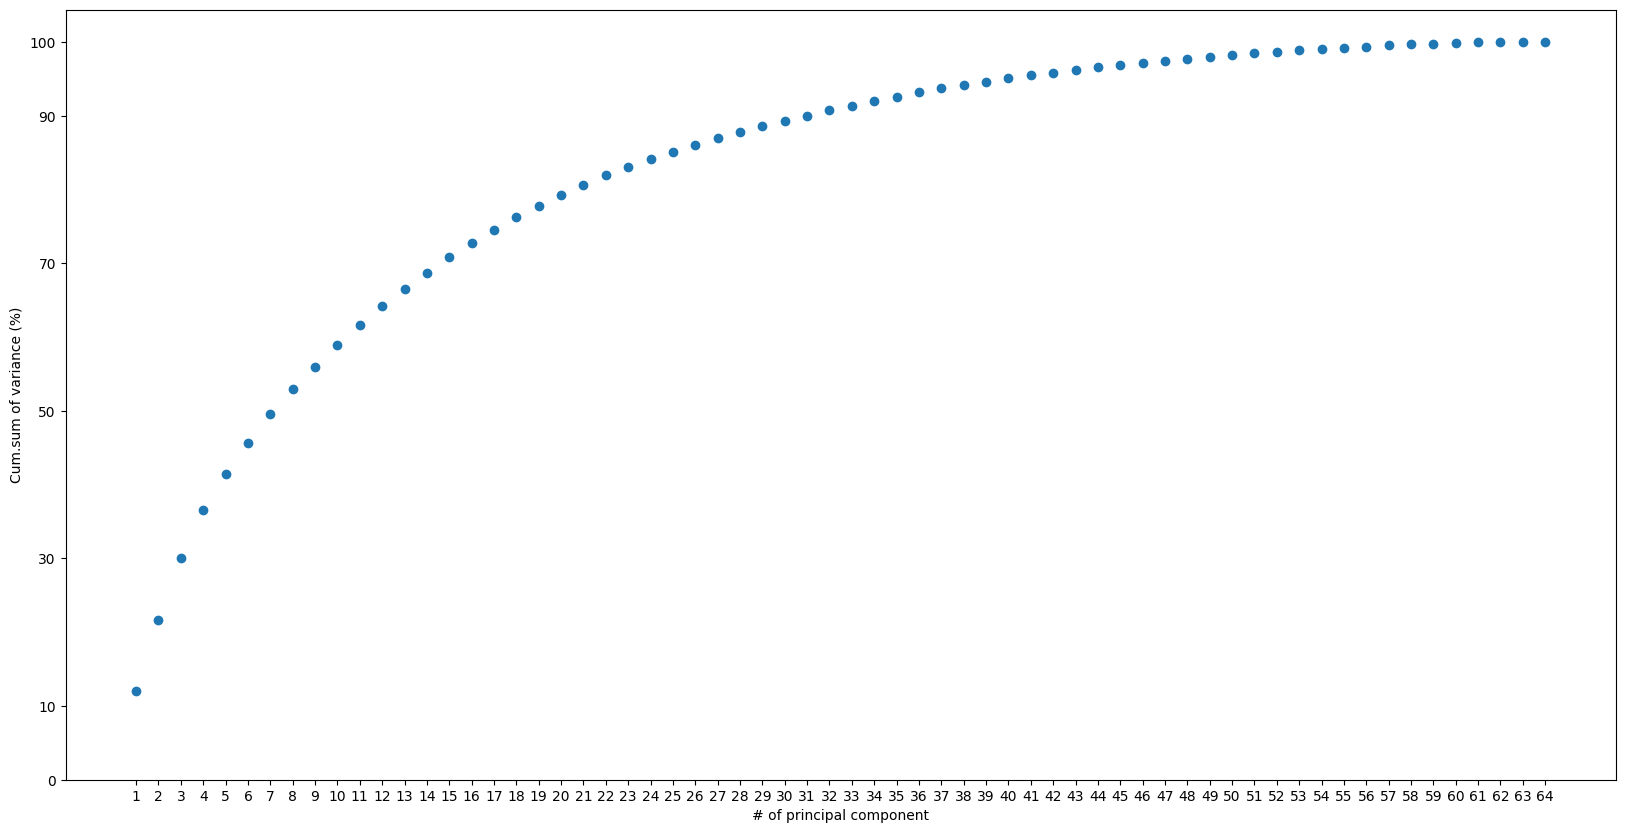

In [47]:
x = [v for v in range(1, 65)]
plt.figure(figsize=(20, 10))
plt.scatter(x=x, y=cum_var)
plt.xticks(x)
plt.xlabel('# of principal component')
plt.yticks([0, 10, 30, 50, 70, 90, 100])
plt.ylabel('Cum.sum of variance (%)')
plt.show()

In [48]:
idx70= np.where(cum_var>=70) [0]
print("누적비율이 70%를 처음 넘는 주성분의 개수 = ", idx70[0])

누적비율이 70%를 처음 넘는 주성분의 개수 =  14


In [49]:
results = pc64[:,:2]
results.shape

(1797, 2)

In [50]:
marker_dict = {'0': '$0$', '1': '$1$', '2': '$2$','3': '$3$', 
               '4': '$4$', '5': '$5$','6': '$6$', '7': '$7$', 
               '8': '$8$', '9': '$9$'}

marker_col = {'0': 'red', '1': 'orange', 
              '2': 'gold','3': 'limegreen', '4': 'green', 
              '5': 'navy','6': 'purple', '7': 'lightgrey', 
              '8': 'grey', '9': 'black'}

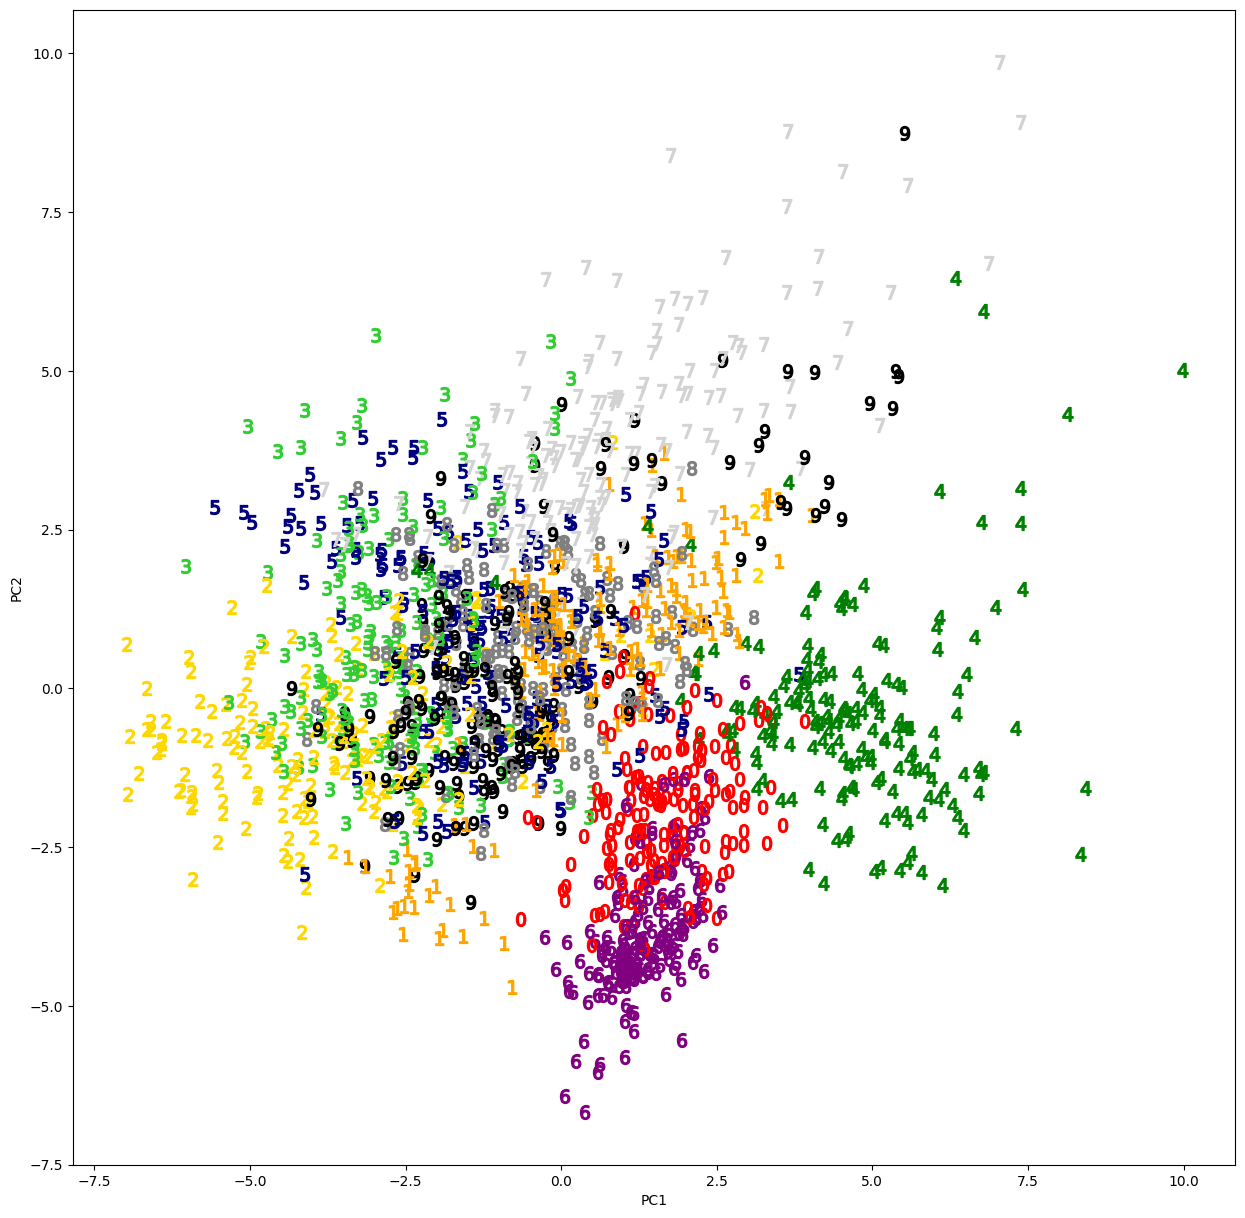

In [51]:
PC1 = results[:, 0]
PC2 = results[:, 1]
plt.figure(figsize=(15, 15))
for i in range(len(PC1)):
  plt.scatter(PC1[i], PC2[i],
  marker=marker_dict[str(target[i])],
  color=marker_col[str(target[i])],s=100)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

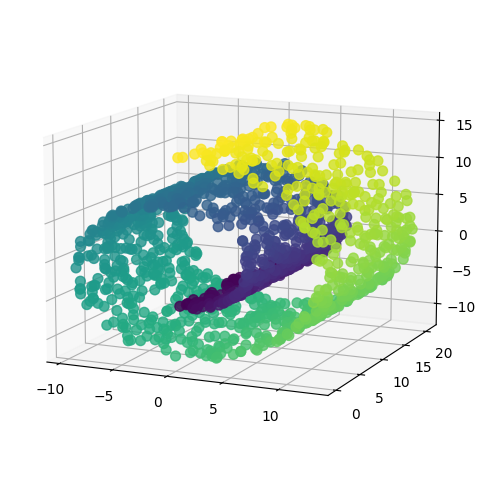

In [54]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
%matplotlib inline
X, y = make_swiss_roll(n_samples=1500, noise=0.05)
fig = plt.figure(figsize=(8,6))
ax= fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(X[:,0], X[:, 1], X[:, 2], c=y, s=50, alpha=0.8)
ax.view_init(azim=-66, elev=12)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaled_X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pc2 = pca.fit_transform(scaled_X)
PC1 = pc2[:, 0]
PC2 = pc2[:, 1]

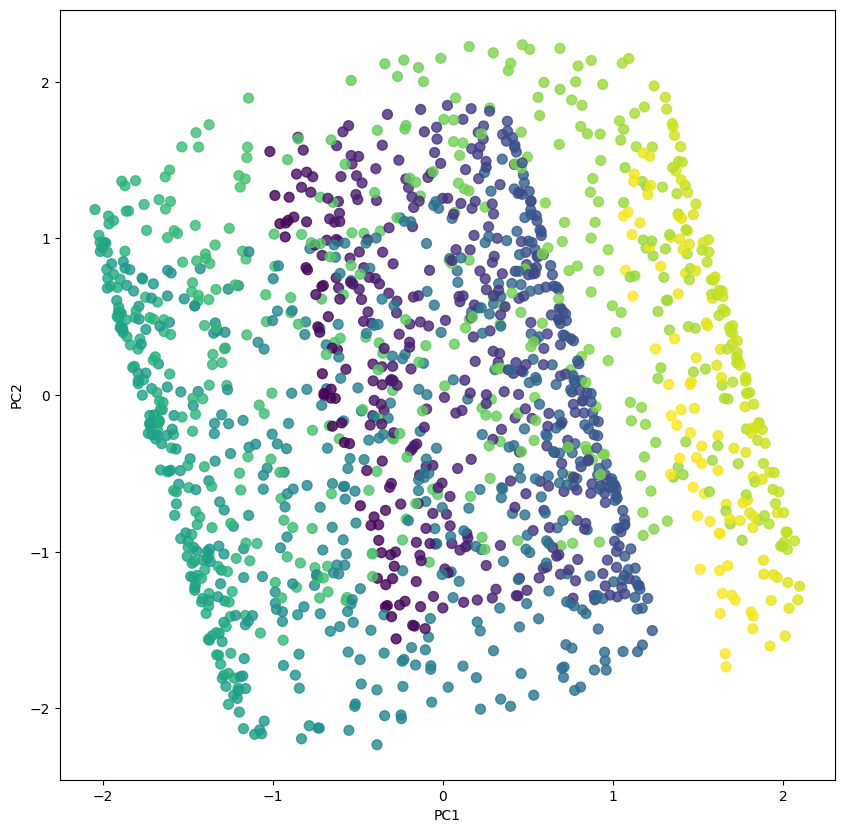

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(PC1,PC2, c=y, s=50, alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()